In [231]:
from ase.geometry.analysis import Analysis
from utils import readStructs

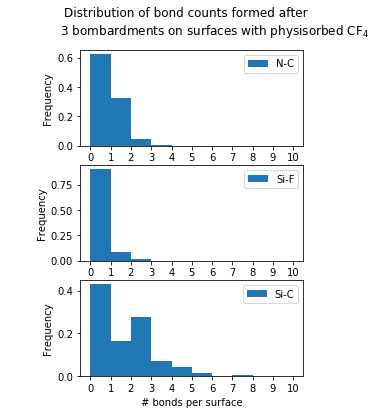

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (4,6))

species = "cf4"
run = "1"
rlim = 11
data = pd.read_csv("../{}_bomb{}_inputs/bondcounts.csv".format(species, run), index_col=0)
fig.suptitle('Distribution of bond counts formed after \n \
             3 bombardments on surfaces with physisorbed $\mathregular{CF_4}$')
data.plot(kind = 'hist', y = 'N-C', bins = np.arange(0, rlim), xticks = np.arange(0,rlim), density = True, ax=axes[0])
data.plot(kind = 'hist', y = 'Si-F', bins = np.arange(0, rlim), xticks = np.arange(0,rlim), density = True, ax=axes[1])
data.plot(kind = 'hist', y = 'Si-C', bins = np.arange(0, rlim), xticks = np.arange(0,rlim), density = True, ax=axes[2])
plt.xlabel("# bonds per surface")
plt.savefig("{}_bomb{}_bonds.png".format(species, run), bbox_inches = 'tight', dpi = 400)

In [233]:
# data = readStructs("../sirich.nhpoor.frun/", shallow = False, name = 'output')
# data['analysis'] = [Analysis(i) for i in data['geom']]
data = pd.read_pickle("../sirich.nhpoor.frun/data.pkl")
data

KeyboardInterrupt: 

In [ ]:
data['sifbonds'] = [i.get_bonds("Si","F") for i in data['analysis']]
data['ffbonds'] = [i.get_bonds("F","F") for i in data['analysis']]

In [ ]:
from structure import getslab
data['slabs'] = [getslab(i) for i in data['geom']]

In [ ]:
data

In [ ]:
from ase.visualize import view
view(gen.read_gen("../sirich.nhpoor.frun/input0-0.gen"))

In [ ]:
view(data['geom'])

In [ ]:
from ase.formula import Formula
import numpy as np
data['slabFratio'] = [
    np.sum([i.symbol == "F" for i in data['slabs'][i]])/np.sum([i.symbol == "F" for i in data['geom'][i]])
    for i in data.index
]
data

In [ ]:
%matplotlib inline
bins = np.arange(0, 0.6, 0.05)
adsData.plot(kind = 'hist', y = 'slabFratio', 
          bins = bins, xticks = bins, title = 'percent of F incorporated into slab')

In [ ]:
data['isolatedFatoms'] =  [
    np.sum([i.symbol == "F" for i in data['geom'][i]])
    - len(data['ffbonds'][i]) - np.sum([i.symbol == "F" for i in data['slabs'][i]])
    for i in data.index
]

In [ ]:
bins = np.arange(4, 20, 1)
annealData.plot(kind = 'hist', y = 'isolatedFatoms', 
          bins = bins, xticks = bins, title = "distribution of # of isolated F atoms / slab")

In [ ]:
data

In [ ]:
data.to_pickle("../sirich.nhpoor.frun/data.pkl")

In [ ]:
adsData = pd.read_pickle("../sirich.nhpoor.fads/data.pkl") 

In [ ]:
annealData = data

In [ ]:
annealData['numffbonds'] = [len(i[0]) for i in annealData['ffbonds']] 
# adsData['numffbonds'] = [len(i[0]) for i in adsData['ffbonds']] 
annealData['numsifbonds'] = [len(i[0]) for i in annealData['sifbonds']] 
# adsData['numsifbonds'] = [len(i[0]) for i in adsData['sifbonds']] 

In [ ]:
changes = [
    np.sum(annealData['numffbonds'] > adsData['numffbonds'])/len(annealData),
    np.sum(annealData['numffbonds'] < adsData['numffbonds'])/len(annealData),
    np.sum(annealData['numffbonds'] == adsData['numffbonds'])/len(annealData),
    np.sum(annealData['numsifbonds'] > adsData['numsifbonds'])/len(annealData),
    np.sum(annealData['numsifbonds'] < adsData['numsifbonds'])/len(annealData),
    np.sum(annealData['numsifbonds'] == adsData['numsifbonds'])/len(annealData)
]

outputStrings = [
   "% of runs with increase in FF bonds:{}",
   "% of runs with decrease in FF bonds:{}",
   "% of runs with no change in FF bonds:{}", 
   "% of runs with increase in SiF bonds:{}",
   "% of runs with decrease in SiF bonds:{}",
   "% of runs with no change in SiF bonds:{}" 
]
for i, j in zip(outputStrings, changes):
    print(i.format(round(j,2)))

In [ ]:
adsData.loc['9-13', 'sifbonds']

In [ ]:
annealData.loc['9-13', 'sifbonds']

In [ ]:
adsData.loc['2-1', 'sifbonds']

In [ ]:
annealData.loc['2-1', 'sifbonds']

In [ ]:
Fpositions = []
for geom in annealData['geom']:
    for atom in geom:
        if atom.symbol == "F":
            Fpositions += [atom.position[2]]
plt.hist(Fpositions, bins = np.arange(12, 40, 1))

In [ ]:
Sicounts = []
for geom in annealData['geom']:
    sicount = 0
    for atom in geom:
        if atom.symbol == "Si" and atom.position[2] > 15:
            sicount += 1
    Sicounts += [sicount]
plt.hist(Sicounts)

In [ ]:
np.mean(Sicounts)

In [ ]:
np.mean(annealData['numsifbonds'])

In [ ]:
annealData = data
Fdensities = []
for fsicount, geom in zip(annealData['numsifbonds'], annealData['geom']):
    minFz = np.min([atom.position[2] for atom in geom if atom.symbol == "F"]) 
    sicount = len([i for i in geom if 
                   i.symbol == "Si" and i.position[2] > 15]) 
    #1.5 is fudge factor for F bonded above Si
    if fsicount == 0:
        Fdensities += [0]
    else:
        Fdensities += [fsicount/sicount]
plt.hist(Fdensities)
plt.title('by min F z coord')
print("average density:{}".format(np.mean(Fdensities)))

In [ ]:
from ase.visualize import view
view(annealData['geom'][annealData['numsifbonds'] == 8])

In [ ]:
mostFslabs = annealData.sort_values(by = 'numsifbonds', ascending = False).iloc[:17, :]['slabs']

In [ ]:
leastFslabs = annealData.sort_values(by = 'numsifbonds').iloc[:17, :]['slabs']

In [ ]:
from ase.geometry.analysis import Analysis
rdfs = []
for slab in mostFslabs:
    a = Analysis(slab)
    rmax = 5
    y, x = a.get_rdf(rmax, nbins = int(rmax // 0.02), elements = ["Si", "N"], return_dists=True)[0]
    rdfs += [y]

In [ ]:
meanrdf = np.mean(np.array(rdfs), axis = 0)
plt.plot(x, meanrdf)
peaks = find_peaks(meanrdf)[0]
maxpeak = max(peaks, key = lambda x: meanrdf[x]) #1NN is highest peak
plt.scatter(x[maxpeak], meanrdf[maxpeak])

In [ ]:
avglens = []
for slab in mostFslabs:
    a = Analysis(slab)
    rmax = 5
    sifbonds = a.get_bonds("Si", "N")
    avglens += [np.mean(a.get_values(sifbonds))]

In [ ]:
np.mean(avglens)

In [ ]:
avglens = []
for slab in leastFslabs:
    a = Analysis(slab)
    rmax = 5
    sifbonds = a.get_bonds("Si", "N")
    avglens += [np.mean(a.get_values(sifbonds))]

In [ ]:
np.mean(avglens)

In [ ]:
(mostFslabspeakX - leastFslabspeakX)/mostFslabspeakX

In [ ]:
from scipy.signal import find_peaks
from ase.geometry.analysis import Analysis
def averageRDF(structs):
    rdfs = []
    for slab in structs:
        slab = slab[[atom.position[2] > 15 for atom in slab]]
        a = Analysis(slab)
        rmax = 5
        y, x = a.get_rdf(rmax, nbins = int(rmax // 0.02), elements = ["Si", "N"], return_dists=True)[0]
        rdfs += [y]
    meanrdf = np.mean(np.array(rdfs), axis = 0)
    plt.plot(x, meanrdf)
    peaks = find_peaks(meanrdf)[0]
    maxpeak = max(peaks, key = lambda x: meanrdf[x]) #1NN is highest peak
    plt.scatter(x[maxpeak], meanrdf[maxpeak])
    return x[maxpeak]
plt.title("mostF")
mostFslabspeakX = averageRDF(mostFslabs)
# plt.show()
plt.title("leastF")
leastFslabspeakX = averageRDF(leastFslabs)
plt.show()
print("1NN peak locations and difference:")
print(mostFslabspeakX, leastFslabspeakX, mostFslabspeakX - leastFslabspeakX)

In [ ]:
from ase.visualize import view
temp = adsData.loc['7-2', 'geom'].copy()
temp.wrap()
view(temp)

In [ ]:
annealData[annealData['numsifbonds'] < adsData['numsifbonds']].index

In [ ]:
adsData.loc['6-13', 'sifbonds']

In [ ]:
bins = np.arange(4)
annealData.plot(kind = 'hist', y = 'numffbonds', xticks = bins, bins = bins)

In [ ]:
mostFslabs

In [ ]:
view(mostFslabs)

In [ ]:
print(os.system("pwd"))

In [ ]:
import os
from input_generation import randomGrid

i = 0
for idx, slab in mostFslabs.iloc[:10].items():
    print(idx)
    slab = gen.read_gen("../input{}.gen".format(i))
    del slab[[atom.index for atom in slab if atom.symbol == "Ar"]]
    outdir = "atomic.f.input{}/".format(i)
#     os.mkdir(outdir)
    randomGrid("Ar", slab, h = 6, outputDir = outdir, numDirs = 1, runsPerDir = 17)
    i += 1

In [ ]:
from ase.io import gen
view([gen.read_gen("atomic.f.input1/" + i) for i in os.listdir("atomic.f.input1")])
view([gen.read_gen("atomic.f.input0/" + i) for i in os.listdir("atomic.f.input0")])

In [ ]:
# estimating atom removal -> etch rate (Å) conversion
# 1 impact per s per cm^2 is 1E-16 impacts per Å^2 per second
# The flux is 6E16 per s per cm^2, so 6 impact per Å^2 per second
# So on a 15x15 surface, for 10 seconds, that's about 13,500 impacts over one cycle

#calculate average number of N, Si atoms in 1Å of material (using the range 7.5-8.5 Å, halfway-ish in slab):


ncounts = []
sicounts = []
for slab in annealData['geom']:
    ncounts += [len([a for a in slab if a.symbol == "N" and 7.5 <= a.position[2] <= 8.5])]
    sicounts += [len([a for a in slab if a.symbol == "Si" and 7.5 <= a.position[2] <= 8.5])]

In [ ]:
np.mean(ncounts), np.std(ncounts)

In [ ]:
plt.hist(ncounts, bins = np.arange(6, 16));

In [ ]:
np.mean(sicounts), np.std(sicounts)

In [ ]:
plt.hist(sicounts, bins = np.arange(4, 14));

In [ ]:
7.9/ 10.4

In [ ]:
annealData.head()

In [ ]:
k = 10 #W/mK
dT0 = 1000 - 100 #K
dx = 

q0 = - 

In [ ]:
aggregatesinbondlengths = []
for idx, row in annealData[['geom', 'analysis', 'sifbonds']].iterrows():
    # get data for structure ``idx``
    geom, ana, sifbonds = row['geom'], row['analysis'], row['sifbonds'][0]
    sinbondlengths = []
    allbonds = ana.all_bonds[0]
    
    # go through each SiF bond
    for atom1, atom2 in sifbonds: # 0 index because each thing assumes some list of structs
        if geom[atom1].symbol == "Si":
            sibonds = allbonds[atom1]
            siIdx = atom1
        elif geom[atom2].symbol == "Si":
            sibonds = allbonds[atom2]
            siIdx = atom2
        else:
            raise Exception("oops")
        
        #go through bondlist for each silicon atom (from list of SiF bonds); find which ones are N
        sinbonds = [i for i in sibonds if geom[i].symbol == "N"]
        
        #get bond lengths for each
        sinbondlengths += [ana.get_bond_value(0, [siIdx, i]) for i in sinbonds]
#         print([ana.get_bond_value(0, [siIdx, i]) for i in sinbonds])
#     print(sinbondlengths)
    aggregatesinbondlengths += sinbondlengths

In [ ]:
allbonds[0]

In [ ]:
aggregatesinbondlengths = []
for idx, row in annealData.loc[leastFslabs.index, ['geom', 'analysis', 'sifbonds']].iterrows():
    # get data for structure ``idx``
    geom, ana, sifbonds = row['geom'], row['analysis'], row['sifbonds'][0]
    sinbondlengths = []
    allbonds = ana.all_bonds[0]
    
    # go through every single bond
    for atom1, bonds in enumerate(allbonds):
        for atom2 in bonds: # 0 index because each thing assumes some list of structs
            if geom[atom1].symbol == "Si":
                sibonds = allbonds[atom1]
                siIdx = atom1
            elif geom[atom2].symbol == "Si":
                sibonds = allbonds[atom2]
                siIdx = atom2
#             else:
#                 raise Exception("oops")

            #go through bondlist for each silicon atom (from list of SiF bonds); find which ones are N
            sinbonds = [i for i in sibonds if geom[i].symbol == "N"]

            #get bond lengths for each
            sinbondlengths += [ana.get_bond_value(0, [siIdx, i]) for i in sinbonds]
    #         print([ana.get_bond_value(0, [siIdx, i]) for i in sinbonds])
    #     print(sinbondlengths)
    aggregatesinbondlengths += sinbondlengths

In [ ]:
aggregatesinbondlengths = np.array(aggregatesinbondlengths)[np.array(aggregatesinbondlengths) < 2.0]
plt.hist(aggregatesinbondlengths)
plt.title("distribution of Si-N bond lengths for Si in structures SiF bond")
print("mean: {}, sd: {}".format(np.mean(aggregatesinbondlengths), np.std(aggregatesinbondlengths)))

In [ ]:
annealData[['geom', 'sifbonds']].iterrows()

In [ ]:
import os
from ase.io import gen
path = "../f.saturate/"
geoms = [gen.read_gen(path + i) for i in os.listdir(path) if "max17" in i]

In [ ]:
from ase.visualize import view
view(geoms)

In [ ]:
s = gen.read_gen("../s0.1_r1.65_max17.5_min5.gen")

In [ ]:
import pandas as pd
pd.Series(s.symbols.formula.count())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

counts, ledges = np.histogram(a = [a.position[2] for a in s if a.symbol == "F"], bins = np.arange(4, 20))
plt.hist(x = [a.position[2] for a in s if a.symbol == "F"], bins = np.arange(4,20))
plt.title("F distribution")


In [ ]:
from scipy.stats import norm
np.random.seed(429)
temp = s.copy()
del temp[[a.index for a in temp if 
          0.17 * np.random.random() > 
          norm(scale = 5, loc = 15).pdf(a.position[2])
          and a.symbol == "F"]]
# view(temp)
temp

In [ ]:
pd.Series(temp.symbols.formula.count())/131

In [ ]:
pd.Series(temp.symbols.formula.count())

In [ ]:
plt.hist(x = [a.position[2] for a in temp if a.symbol == "F"], bins = np.arange(4,20))
plt.title("F distribution")

In [ ]:
view(temp)

In [ ]:
np.mean([a.position[2] for a in temp if a.symbol == "F"])

In [ ]:
gen.write_gen("sif0.75.gen", temp)

In [ ]:
from ase.build import diamond100, diamond111, add_vacuum
from ase.visualize import view
slab = diamond100('Si', size=(8, 8, 4), vacuum = 10)
for atom in slab:
    atom.position[2] = atom.position[2] - 8 
view(slab)
slab

In [ ]:
np.max(b.positions[:, 2])

In [ ]:
from ase.build import bulk, make_supercell
from ase.constraints import FixAtoms
from ase.atom import Atom
# b = bulk("Si", 'diamond', orthorhombic=True)
b = diamond111("Si", size = (1,1,11))
del b[[a.index for a in b if a.position[2] == np.max(b.positions[:, 2])]]
#make unit cell
# m1, m2 = 1, 2
# b = make_supercell(b, P = np.array([[m1, 0, 0], [0, m1, 0], [0, 0, m2]]))

# terminate 
topSi, botSi = np.array(sorted(b, key = lambda a: a.position[2], reverse = True))[np.array([0, -1])]
temp = Atom("H", position = topSi.position.copy())
temp.position += np.array([0, 0, 1.4])
b.append(temp)
temp = Atom("H", position = botSi.position.copy())
temp.position -= np.array([0, 0, 1.4])
b.append(temp)

b.center(vacuum = 10, axis = (2))
view(b)

# #extend to supercell slab
m1, m2 = 6, 1
b = make_supercell(b, P = np.array([[m1, 0, 0], [0, m1, 0], [0, 0, m2]]))

#constrain middle layer
midZ = b.cell[2,2]/2 #assume Cell object is 3x3 array
midDist = lambda atom: np.abs(atom.position[2] - midZ)
b2 = sorted(b, key = midDist, reverse = False)
b = b[[atom.index for atom in b2]]
b.constraints = FixAtoms(np.arange(2 * 2 * 8 * 2))

view(b)
b
# gen.write_gen("slab.gen")

In [ ]:
from ase.io import vasp
for i in range(5):
    s = vasp.read_vasp("../POSCAR{}".format(i))
    
    argons = [a for a in s if a.symbol == "Ar"]
    minArZ = min([np.abs(a.position[2] - 17.422) for a in argons])
    minAr = [a for a in s if np.abs(a.position[2] - 17.422) == minArZ][0]
    
    del s[[a.index for a in s if s.get_distance(a.index, minAr.index, mic = True) > 5]]
#     view(s)
    print(s)
    vasp.write_vasp("../POSCAR{}_trimmed".format(i), s, vasp5=True, sort = True)

In [ ]:
from ase.io import gen
import pandas as pd
import numpy as np
from ase.geometry.analysis import Analysis

def getslab(struct):
    """
    Input: 
        struct: structre from which we will trim unbound species (.gen file)
    Output:
        baseslab: structure with unbound species trimmed
    """
    adjmat = Analysis(struct).adjacency_matrix[0]
    numnodes = adjmat.shape[0]
    g = Graph(numnodes)
    for i in range(numnodes):
        for j in range(numnodes):
            if adjmat[i,j]:
                g.addEdge(i,j)
    cc = g.connectedComponents()
    maingraph = np.array([i for i in cc if 0 in i][0])
    return struct[[atom.index for atom in struct if atom.index in maingraph]]
# Python program to print connected
# components in an undirected graph
# https://www.geeksforgeeks.org/connected-components-in-an-undirected-graph/

def getslabs(data, directory, useInputs = False):
    """
    Utility for getting and writing slab files from readData (utils.py) function
    data is the df from readData function or any df with (struct, in) and (struct, out) columns
    """

    if useInputs:
        slabSource = data['struct']['in']
    else:
        slabSource = data['struct']['out']

    dataDir = directory
    slabs = {}

    # # to generate slabs

    for key, value in slabSource.iteritems():
        slabs[key] = getslab(value)

    for key, value in slabs.items():
        gen.write_gen(dataDir + "slab{}.gen".format(key), value)

    # to read slabs
    for key in data.index:
        slabs[key] = gen.read_gen(dataDir + "slab{}.gen".format(key))

    if useInputs:
        data.loc[:, ('struct', 'inslab')] = pd.Series(slabs)
    else:
        data.loc[:, ('struct', 'outslab')] = pd.Series(slabs)

class Graph:
 
    # init function to declare class variables
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]
 
    def DFSUtil(self, temp, v, visited):
 
        # Mark the current vertex as visited
        visited[v] = True
 
        # Store the vertex to list
        temp.append(v)
 
        # Repeat for all vertices adjacent
        # to this vertex v
        for i in self.adj[v]:
            if visited[i] == False:
 
                # Update the list
                temp = self.DFSUtil(temp, i, visited)
        return temp
 
    # method to add an undirected edge
    def addEdge(self, v, w):
        self.adj[v].append(w)
        self.adj[w].append(v)
 
    # Method to retrieve connected components
    # in an undirected graph
    def connectedComponents(self):
        visited = []
        cc = []
        for i in range(self.V):
            visited.append(False)
        for v in range(self.V):
            if visited[v] == False:
                temp = []
                cc.append(self.DFSUtil(temp, v, visited))
        return cc

# This code is contributed by Abhishek Valsan

In [ ]:
s = gen.read_gen("../geom.out.gen")
view(s)

In [257]:
zmincutoff = 0.1
hbondrange = 3
geom = s
adjmat = Analysis(geom).adjacency_matrix[0]
numnodes = adjmat.shape[0]
g = Graph(numnodes)
for i in range(numnodes):
    for j in range(numnodes):
        if adjmat[i,j]:
            g.addEdge(i,j)
cc = g.connectedComponents()
maingraph = np.array([i for i in cc if 0 in i][0])
slab = geom[[atom.index for atom in geom if atom.index in maingraph]]
zcutoff = np.max([atom.position[2] for atom in slab]) + hbondrange
fragGraphs = [i for i in cc if 0 not in i]
fragGraphs

[[332, 406],
 [370, 371, 372, 373, 374],
 [375, 376, 377, 378, 379],
 [380, 381, 382, 383, 384],
 [385, 386, 387, 388, 389],
 [390, 391, 392, 393, 394],
 [395, 396, 397, 398, 399],
 [400, 401, 402, 403, 404],
 [405, 407, 408],
 [410, 411, 412, 413, 414],
 [415]]

In [259]:
fragZs = [[geom[i].position[2] for i in frag] for frag in fragGraphs]
fragZs

[[30.94305269, 30.91306162],
 [18.73715783, 19.01606174, 19.455838, 19.05673817, 17.39201185],
 [19.67107969, 19.81566382, 19.76365667, 20.64472198, 18.42870266],
 [23.57178819, 24.56344366, 24.38548957, 23.28521734, 22.33560538],
 [22.19243605, 21.49761106, 22.57789795, 21.1708585, 23.31611807],
 [25.69639619, 26.38995213, 24.67736033, 24.91874807, 26.73625607],
 [21.70335856, 22.7657115, 21.32120148, 22.02017074, 20.78532815],
 [22.1118511, 21.5480909, 23.36543926, 21.2383696, 22.13556247],
 [18.71733052, 18.82500405, 18.02808122],
 [21.95326613, 22.56408393, 21.61094377, 22.80745148, 20.782576],
 [26.1875236]]

In [251]:
removeFrag = [np.all(np.array(i) > zcutoff) or np.all(np.array(i) < zmincutoff)
              for i in fragZs]
removeFrag

[True, False, False, True, False, True, False, False, False, False, True]

In [252]:
atomsToRemove = [i for g,r in zip(fragGraphs, removeFrag) if r for i in g]
atomsToRemove

[332, 406, 380, 381, 382, 383, 384, 390, 391, 392, 393, 394, 415]

In [256]:
removedAtoms = {'Si': 0, 'N': 0, 'H': 0, 'Ar': 0, 'F':0, 'C':0}
for idx in atomsToRemove:
    removedAtoms[s[idx].symbol] += 1
removedAtoms

{'Si': 0, 'N': 0, 'H': 1, 'Ar': 1, 'F': 9, 'C': 2}

In [260]:
s2 = s.copy()
del s2[[atom.index for atom in s2 if atom.index in atomsToRemove]]
view([s, s2])